<center> <h3> Do experts overrate the extent of their expertise? </h3></center>  
This lab activity uses the open data from Study 1b of Atir, Rosenzweig, & Dunning (2015) to teach multiple
regression. Results of the activity provided below should *exactly* reproduce the results described in the paper.

**CITATION**  
Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived
expertise predicts claims of impossible knowledge. Psychological Science, 26, 1295-1303.

**LEARNING OBJECTIVES**  
* Calculate descriptive statistics.
* Conduct multiple regression analyses.
* Conduct t-tests

**STUDY DESCRIPTION**  
Valuing expertise is important for modern life. When people have a problem, they need to know who to
turn to for a solution to their problem. For example, when people get sick, they know that a doctor is an
expert in the field of medicine and can help them get better. In general, experts simply know more about
a topic than do non-experts. However, experts may be vulnerable to a particular problem of knowing so
much. They may have the illusion that they know more about a topic than they actually do.

This particular type of overconfidence is called *overclaiming*. Essentially, overclaiming occurs when people
claim that they know something that is impossible to know, such as claiming to know the capital of
Sharambia (a country that doesn’t actually exist).

To test if experts are susceptible to overclaiming, Atir, Rosenzweig, and Dunning (2015) recruited 202
individuals from an online participant pool. They first asked participants to complete either a measure of
self-perceived knowledge, or an overclaiming task (to test for a possible order effect, half of the
participants completed the measure of perceived knowledge first, whereas the other half completed the
overclaiming task first). The self-perceived knowledge questionnaire asked people to indicate their level
of knowledge in the area of personal finance. The overclaiming task asked participants to indicate how
much they knew about 15 terms related to personal finance (e.g., home equity). Included in the 15 items
were three terms that do not actually exist (e.g., annualized credit). Thus, overclaiming occurred when
participants said that they were knowledgeable about the non-existent terms. Finally, participants
completed a test of financial literacy called the FINRA. Whereas the earlier questionnaires measured
self-perceived knowledge, the FINRA measured actual knowledge.

**Analyses**

1. Open the data file (called Atir Rosenzweig Dunning 2015 Study 1b).

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind

# Uncomment and Set directories if you are using dataset from your own local machine
# data_dir = '<insert path to directory where dataset is located>'
# os.chdir(data_dir)


# Load dataset into dataframe
file_id = '0Bz-rhZ21ShvOTnM5YmJQOHpZNzA'
resource_key = '0-d12XfcSZxwDJc-PKPwC0rQ'

# Construct a direct download link
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}&resourcekey={resource_key}'
df = pd.read_csv(direct_link) 

print(df.head())

   id  order_of_tasks  self_perceived_knowledge  overclaiming_proportion  \
0   1               1                       5.5                 0.444444   
1   7               1                       4.5                 0.555556   
2  10               1                       3.5                 0.166667   
3  12               1                       6.0                 0.722222   
4  14               1                       2.5                 0.388889   

   accuracy  FINRA_score  
0  0.250000            4  
1  0.194444            4  
2  0.347222            5  
3 -0.055556            4  
4  0.166667            3  


2. First, calculate means and standard deviations for overclaiming.

In [2]:
# NumPy provides functions for numerical operations like mean and standard deviation
overclaiming_mean = np.mean(df['overclaiming_proportion'])  # Replace 'column_name' with column you're looking for
print(f'Mean of overclaiming: {overclaiming_mean}')

# use the docs (https://numpy.org/doc/stable/user/absolute_beginners.html) to find the standard deviation function 
# uncomment and complete the lines below with the right function
overclaiming_std = np.std(df['overclaiming_proportion'])  
print(f'Standard Deviation of overclaiming: {overclaiming_std}')

Mean of overclaiming: 0.30803080312376235
Standard Deviation of overclaiming: 0.23165153662372667


3. You next want to examine the relationship between self-perceived knowledge and overclaiming. You
also want to take into account the accuracy with which participants responded during the overclaiming
task (that is the ability of people to distinguish between the 12 real terms and the 3 fake terms). Conduct
an analysis that uses both self-perceived knowledge and accuracy to predict overclaiming.

In [3]:
# statsmodels for regression analysis
X = df[['self_perceived_knowledge', 'accuracy']]  # Replace with your independent variables
y = df['overclaiming_proportion']  # Replace with your dependent variable 
X = sm.add_constant(X)  # Adds a constant term to the predictor

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the results
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     overclaiming_proportion   R-squared:                       0.705
Model:                                 OLS   Adj. R-squared:                  0.702
Method:                      Least Squares   F-statistic:                     237.7
Date:                     Tue, 03 Feb 2026   Prob (F-statistic):           1.80e-53
Time:                             20:29:13   Log-Likelihood:                 132.08
No. Observations:                      202   AIC:                            -258.2
Df Residuals:                          199   BIC:                            -248.2
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

4. You next want to determine whether there is an order effect (based on whether participants
completed the self-perceived knowledge measure first, or the overclaiming task first. Compare the mean
level of overclaiming based on the order of the tasks.

Overclaiming mean (order_of_tasks=1): 0.3437843784554455
Overclaiming mean (order_of_tasks=0): nan
Mean difference: nan, t-statistic: nan, p-value: nan, is there a difference? No


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


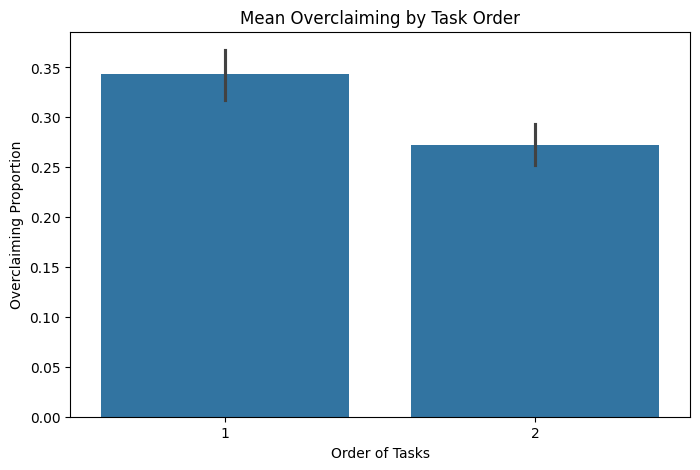

In [4]:
# which test should you use to compare means between two groups?
over_first = df[df['order_of_tasks'] == 1]['overclaiming_proportion']
spk_first = df[df['order_of_tasks'] == 0]['overclaiming_proportion']

t, p = ttest_ind(over_first, spk_first, equal_var=False) 

mean_diff = over_first.mean() - spk_first.mean()

print(f'Overclaiming mean (order_of_tasks=1): {over_first.mean()}')
print(f'Overclaiming mean (order_of_tasks=0): {spk_first.mean()}')
print(f"Mean difference: {mean_diff}, t-statistic: {t}, p-value: {p}, is there a difference? {('Yes' if p < 0.05 else 'No')}")

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='order_of_tasks', y='overclaiming_proportion', errorbar=('ci', 68))
plt.title('Mean Overclaiming by Task Order')
plt.xlabel('Order of Tasks')
plt.ylabel('Overclaiming Proportion')
plt.show()

5. If you found a significant difference in overclaiming in the analysis above (#4), re-perform the analysis
from #3 to check to see if the relationship between self-perceived knowledge and overclaiming changes,
when taking into account the order of the tasks.

In [5]:
# another regression analysis
# predictors: self-perceived knowledge
# controls: order of tasks
# outcome: overclaiming

X = df[['self_perceived_knowledge', 'accuracy', 'order_of_tasks']]
X = sm.add_constant(X)
y = df['overclaiming_proportion']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     overclaiming_proportion   R-squared:                       0.705
Model:                                 OLS   Adj. R-squared:                  0.700
Method:                      Least Squares   F-statistic:                     157.7
Date:                     Tue, 03 Feb 2026   Prob (F-statistic):           3.15e-52
Time:                             20:29:13   Log-Likelihood:                 132.08
No. Observations:                      202   AIC:                            -256.2
Df Residuals:                          198   BIC:                            -242.9
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

6. You next want to determine if the self-perceived knowledge still predicts overclaiming while
accounting for the variance due to genuine expertise, as measured by the FINRA. First, find the mean and
standard deviation for scores on the FINRA. Then, re-perform the analysis from #3, but this time include
scores on the FINRA as an additional predictor variable.

In [6]:
# calculate mean and standard deviation as you did above
finra_mean = np.mean(df['FINRA_score'])
print(f'Mean of FINRA score: {finra_mean}')

finra_std = np.std(df['FINRA_score'])
print(f'Standard Deviation of FINRA score: {finra_std}')

# run regression analysis as you did above
X = df[['self_perceived_knowledge', 'FINRA_score']]
X = sm.add_constant(X)
y = df['overclaiming_proportion']

model = sm.OLS(y, X).fit()
print(model.summary())

Mean of FINRA score: 3.698019801980198
Standard Deviation of FINRA score: 1.1869321631853784
                               OLS Regression Results                              
Dep. Variable:     overclaiming_proportion   R-squared:                       0.272
Model:                                 OLS   Adj. R-squared:                  0.265
Method:                      Least Squares   F-statistic:                     37.17
Date:                     Tue, 03 Feb 2026   Prob (F-statistic):           1.92e-14
Time:                             20:29:13   Log-Likelihood:                 40.863
No. Observations:                      202   AIC:                            -75.73
Df Residuals:                          199   BIC:                            -65.80
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t

7. Prepare an APA-style results section for the analyses you completed.

In [7]:
# Extract key statistics from the fitted models
intercept, slope1, slope2 = model.params
t_value1 = model.tvalues['self_perceived_knowledge']
t_value2 = model.tvalues['FINRA_score']
p_value_const = model.pvalues['const']
p_value1 = model.pvalues['self_perceived_knowledge']
p_value2 = model.pvalues['FINRA_score']
r_squared = model.rsquared
f_value = model.fvalue
df_model = int(model.df_model)
df_resid = int(model.df_resid)

# APA-style formatted output for linear regression
apa_report = (
    f"A simple linear regression was conducted to predict y from X1 and X2. "
    f"The regression equation was significant, F({df_model}, {df_resid}) = {f_value:.2f}, p = {p_value_const:.3f}, "
    f"with an R² of {r_squared:.2f}. "
    f"The slope for X1 was {slope1:.2f} (SE = {model.bse['self_perceived_knowledge']:.2f}), t({df_resid}) = {t_value1:.2f}, p = {p_value1:.3f}. "
    f"The slope for X2 was {slope2:.2f} (SE = {model.bse['FINRA_score']:.2f}), t({df_resid}) = {t_value2:.2f}, p = {p_value2:.3f}."
)

print(apa_report)

# You've formatted other tests for APA reports. Do that again here if you ran other tests.

A simple linear regression was conducted to predict y from X1 and X2. The regression equation was significant, F(2, 199) = 37.17, p = 0.745, with an R² of 0.27. The slope for X1 was 0.11 (SE = 0.01), t(199) = 8.60, p = 0.000. The slope for X2 was -0.04 (SE = 0.01), t(199) = -3.33, p = 0.001.
